# Women Cloth Reviews Prediction with Multi Nomial Naïve Bayes

OBJECTIVE:

    The objective of the Women's Clothing Reviews Prediction project with Multinomial Naïve Bayes could be as follows:

           1) Sentiment Analysis of Reviews: Predict the sentiment of customer reviews (positive, neutral, or negative) on women's clothing. The goal is to classify reviews based on whether customers express satisfaction, dissatisfaction, or neutrality toward the products.

           2)Identifying Key Features in Reviews: Use the model to identify which words or phrases are most strongly associated with positive or negative sentiments. This can help the business understand common feedback themes, customer needs, and potential areas of improvement.

           3)Improving Customer Experience: By analyzing the patterns in reviews, the business can take targeted actions to improve the customer experience by addressing common pain points or enhancing popular features.

           4)Data-Driven Marketing: Insights from this project could assist the marketing team by highlighting product aspects that customers frequently praise, allowing for more personalized and effective advertising strategies.

   Using Multinomial Naïve Bayes here is suitable as it works well with text data and is computationally efficient, making it ideal for a classification problem with a large vocabulary size as found in reviews.

DATA SOURCE:

    Publicly Available Datasets: I DOWNLOAD THIS DATASET FREOM YBI FOUNDATION GITHUB PAGE

IMPORTING LIBRARY

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATASET

In [8]:
a=pd.read_csv('/content/Women Clothing E-Commerce Review.csv')

DESCRIBE DATA

In [9]:
a.describe()

,Clothing ID,Age,Rating,Recommended,Positive Feedback
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [10]:
a.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [11]:
a.tail()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


DATA VISUALIZATION

<ipython-input-20-e971a5d040cf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=a, x='Rating', palette='viridis')


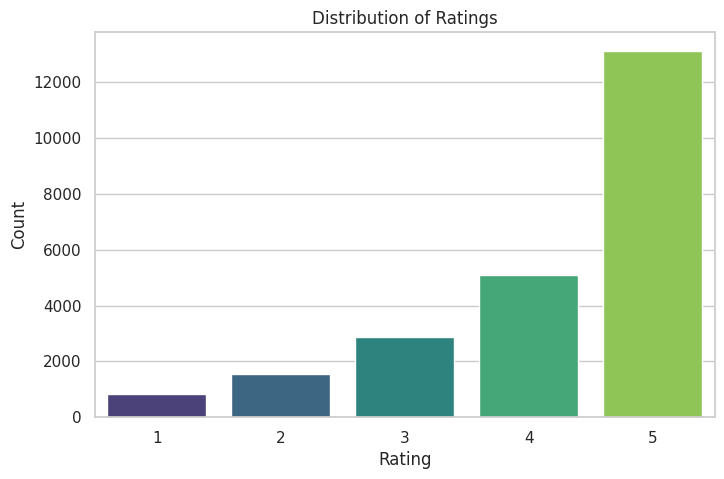

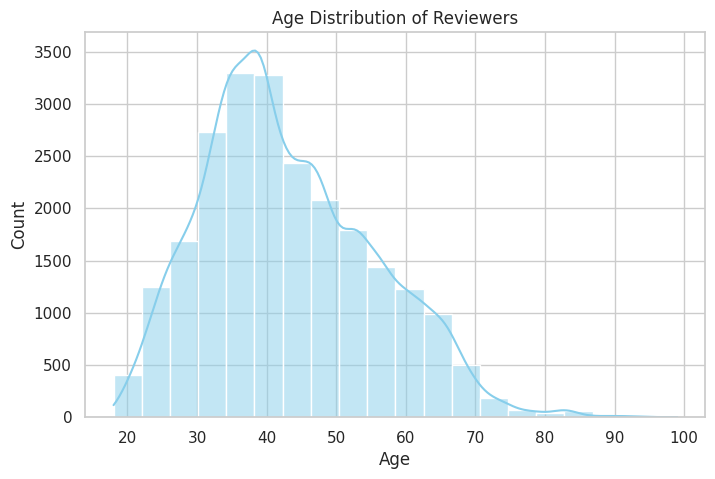

<ipython-input-20-e971a5d040cf>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=a, x='Recommended', palette='pastel')


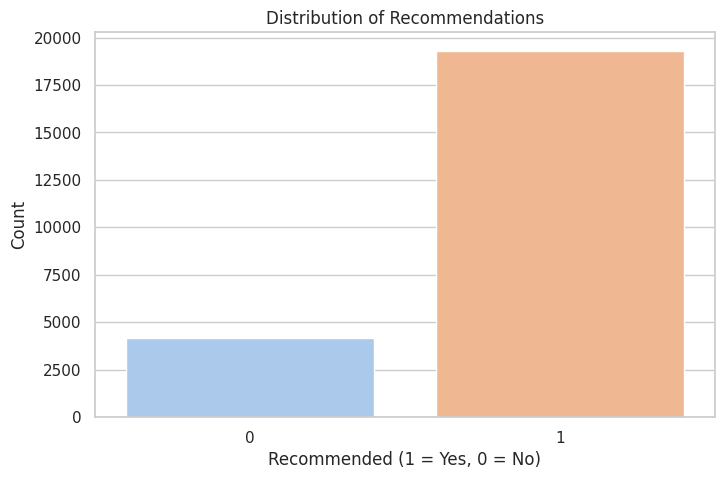

<ipython-input-20-e971a5d040cf>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=a, y='Category', order=a['Category'].value_counts().index, palette='magma')


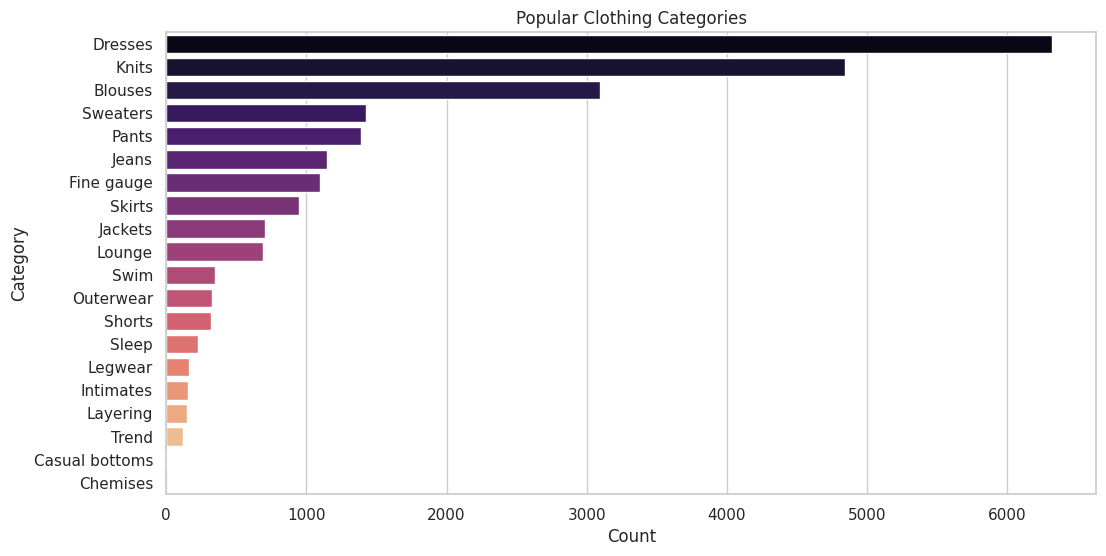

In [20]:
sns.set(style="whitegrid")

# 1. Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=a, x='Rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 2. Age Distribution of Reviewers
plt.figure(figsize=(8, 5))
sns.histplot(a['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Reviewers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 3. Distribution of Recommendations
plt.figure(figsize=(8, 5))
sns.countplot(data=a, x='Recommended', palette='pastel')
plt.title('Distribution of Recommendations')
plt.xlabel('Recommended (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# 4. Popular Clothing Categories
plt.figure(figsize=(12, 6))
sns.countplot(data=a, y='Category', order=a['Category'].value_counts().index, palette='magma')
plt.title('Popular Clothing Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

DATA PREPROCESSING

In [13]:
a.isna().sum()

,0
Clothing ID,0
Age,0
Title,3810
Review,845
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [14]:
a [a['Review']==""]=np.NaN

In [15]:
a.isna().sum()

,0
Clothing ID,0
Age,0
Title,3810
Review,845
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [16]:
a['Review']

,Review
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...
...,...
23481,I was very happy to snag this dress at such a ...
23482,"It reminds me of maternity clothes. soft, stre..."
23483,"This fit well, but the top was very see throug..."
23484,I bought this dress for a wedding i have this ...


In [17]:
a.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

DEFINE FEATURE VARIABLE(X) AND TARGET VARIABLE(Y)

In [21]:
x=a['Review']

In [22]:
y=a['Rating']

In [23]:
a['Rating'].value_counts()

,count
Rating,
5,13131
4,5077
3,2871
2,1565
1,842


TRAIN TEST SPLIT

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, stratify=y, random_state=2529)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(lowercase = True, analyzer='word',ngram_range=(2,3), stop_words='english',max_features=5000)

In [35]:
cv = CountVectorizer()

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

x = x.fillna('')
cv = CountVectorizer()
x_train_transformed = cv.fit_transform(x)
x_test_transformed = cv.fit_transform(x)

In [50]:
cv.get_feature_names_out()

array(['00', '000', '00p', ..., 'zooming', 'zuma', 'ã¼ber'], dtype=object)

In [51]:
x_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
x_test = cv.fit_transform(x)

In [53]:
cv.get_feature_names_out()

array(['00', '000', '00p', ..., 'zooming', 'zuma', 'ã¼ber'], dtype=object)

In [54]:
x_test_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

MODELING

In [78]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

MODEL EVOLUTION

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
y_pred = y_pred[:len(y_test)]
print(confusion_matrix(y_test, y_pred))

[[  99    6    4   20  124]
 [ 168   10    6   36  250]
 [ 297   29   17   58  460]
 [ 524   57   26  117  799]
 [1385  132   67  291 2064]]


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.04      0.39      0.07       253
           2       0.04      0.02      0.03       470
           3       0.14      0.02      0.03       861
           4       0.22      0.08      0.11      1523
           5       0.56      0.52      0.54      3939

    accuracy                           0.33      7046
   macro avg       0.20      0.21      0.16      7046
weighted avg       0.38      0.33      0.34      7046



MODEL PREDICTION

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Review' is the text column and 'Rating' (or similar) is the target label
# Prepare data (replace 'Review' and 'Rating' with your actual column names)
X = a['Review'].fillna('')  # Fill NaN reviews with an empty string
y = a['Rating']

# Convert text to numeric features
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = MultinomialNB()
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)

# Check shape and output of predictions
print("#SHAPE",y_pred.shape)
print(y_pred)

# Optionally, print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


#SHAPE (4698,)
[4 5 5 ... 5 4 5]
Accuracy: 0.6334610472541508
              precision    recall  f1-score   support

           1       0.33      0.07      0.11       153
           2       0.34      0.09      0.14       317
           3       0.43      0.46      0.44       620
           4       0.41      0.40      0.40      1017
           5       0.77      0.87      0.81      2591

    accuracy                           0.63      4698
   macro avg       0.45      0.38      0.38      4698
weighted avg       0.60      0.63      0.61      4698



EXPLANATION -->

1. Data Loading and Overview
You start by loading a dataset containing reviews of women’s clothing. After loading, you check the summary statistics of the dataset, which gives you an overview of the numerical values, such as counts, means, and ranges for different columns.

2. Visualizations
You create several plots to understand the data better:

Distribution of Ratings: A bar chart shows how many reviews fall into each rating category, helping you see which ratings are most common.

Age Distribution of Reviewers: A histogram displays the ages of reviewers, giving you an idea of the age range of people providing feedback.

Distribution of Recommendations: Another bar chart indicates how many reviewers recommended the products (marked as 'Yes' or 'No').

Popular Clothing Categories: A horizontal bar chart shows which clothing categories are most reviewed, allowing you to see trends in what items are most popular.

3. Handling Missing Values
You check for any missing values in the dataset. If any review is empty, you replace it with a "NaN" (Not a Number) to identify it as missing data.

4. Preparing for Model Training
You separate the review texts (features) and their corresponding ratings (target labels) for model training. You also confirm that the ratings are well-distributed across the different classes.

5. Splitting the Data
Next, you split the dataset into training and testing sets. The training set is used to train the model, while the testing set is for evaluating its performance. You ensure that the split maintains the same distribution of ratings.

6. Text Vectorization
To convert the text reviews into a format suitable for the model, you use a technique called vectorization. This transforms the text into numerical features. In this case, you're looking at combinations of words (bigrams and trigrams) to capture context better.

7. Training the Model
You select the Naive Bayes algorithm for text classification. After transforming the reviews into numerical data, you train the model using the training set.

8. Making Predictions and Evaluating the Model
Once the model is trained, you use it to predict ratings for the reviews in the testing set. You then evaluate how well the model performed by comparing the predicted ratings to the actual ratings. You display a confusion matrix (which shows true vs. predicted ratings) and a classification report (which provides metrics like accuracy, precision, recall, and F1-score) to understand the model's performance.

Summary:

Overall, your workflow includes loading and exploring the data, visualizing key trends, preparing the data for modeling, training a classification model using review texts, and evaluating its performance based on predictions. This process helps in understanding customer sentiments towards clothing products based on their reviews.






